<a href="https://colab.research.google.com/github/Ramesh39-collab/leukemia-detection/blob/main/inceptionV3(leukemia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mehradaria/leukemia')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ramesh9354
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mehradaria/leukemia


100%|██████████| 110M/110M [00:00<00:00, 1.38GB/s]

In [ ]:
!nvidia-smi

Sat Sep  6 14:49:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Import model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


#Import dataset

In [ ]:
train_dir = "/content/leukemia/Segmented"

#Preprocess Data

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2607 images belonging to 4 classes.
Found 649 images belonging to 4 classes.


#Load InceptionV3 Model

In [ ]:
# Load pretrained InceptionV3 without top layers
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False   # freeze feature extractor

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(4, activation="softmax")(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Train Model

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=15)


Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7044 - loss: 0.7547

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 750ms/step - accuracy: 0.7058 - loss: 0.7515 - val_accuracy: 0.8382 - val_loss: 0.4945
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 475ms/step - accuracy: 0.8969 - loss: 0.2732 - val_accuracy: 0.8798 - val_loss: 0.3778
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 471ms/step - accuracy: 0.9189 - loss: 0.2217 - val_accuracy: 0.8382 - val_loss: 0.4640
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 479ms/step - accuracy: 0.9298 - loss: 0.2021 - val_accuracy: 0.8937 - val_loss: 0.3455
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 475ms/step - accuracy: 0.9291 - loss: 0.2036 - val_accuracy: 0.8844 - val_loss: 0.3269
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 487ms/step - accuracy: 0.9386 - loss: 0.1571 - val_accuracy: 0.8814 - val_loss: 0.3649
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - accuracy: 0.9357 - loss: 0.1762 - val_accuracy: 0.9014 - val_loss: 0.3177
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - accuracy: 0.9365 - loss: 0.1787 - val_accuracy: 0.909

#Check Training & Validation Accuracy

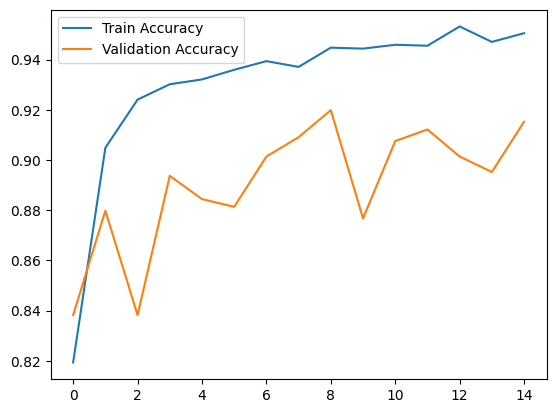

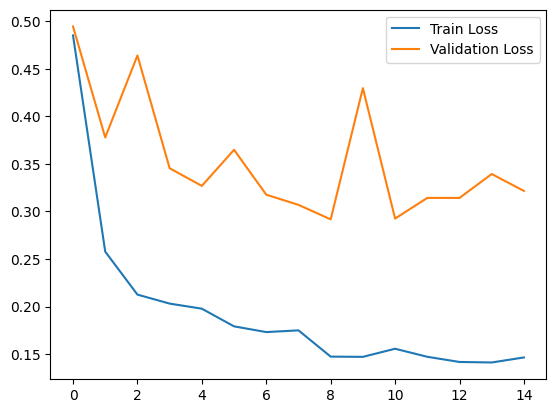

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#Evaluate on Validation/Test Data

In [ ]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.9077 - loss: 0.2958
Validation Accuracy: 90.45%


#Predict on a Single Image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to one test image
img_path = "/content/leukemia/Segmented/Early/WBC-Malignant-Early-001.jpg" #now i take a image from Early dataset, for check it work or not

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
class_labels = list(train_gen.class_indices.keys())
print("Predicted Class:", class_labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Class: Early


#Confusion Matrix (See Misclassifications)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions for validation set
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 639ms/step
Confusion Matrix:
 [[21 23 26 30]
 [22 58 74 43]
 [41 50 47 54]
 [27 44 45 44]]
              precision    recall  f1-score   support

      Benign       0.19      0.21      0.20       100
       Early       0.33      0.29      0.31       197
         Pre       0.24      0.24      0.24       192
         Pro       0.26      0.28      0.27       160

    accuracy                           0.26       649
   macro avg       0.26      0.26      0.26       649
weighted avg       0.27      0.26      0.26       649

